#Random Forest Model
https://www.tensorflow.org/decision_forests/tutorials/beginner_colab

In [1]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#get data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Libraries
import pandas as pd
import numpy as np
from collections import Counter

# load numpy array from csv file
from numpy import loadtxt

#plotting performance
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_decision_forests as tfdf

## Load prepared dataset

In [4]:
# load array
X = loadtxt('/content/drive/MyDrive/data/X.csv', delimiter=',')
y = loadtxt('/content/drive/MyDrive/data/y.csv', delimiter=',')

# print the array
print(X)
print(y)

[[2.5500e+02 1.2175e+04 4.5290e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [9.5500e+02 4.6240e+03 2.0400e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0710e+03 2.2600e+02 3.8400e+02 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [4.8200e+02 1.5190e+03 2.3740e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0380e+04 4.2600e+02 3.6280e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 5.5100e+02 5.6530e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
X.shape

(14972, 255)

In [6]:
y.shape

(14972, 76)

In [7]:
y = np.argmax(y, axis=1)

In [8]:
y

array([16, 10, 20, ..., 26, 20,  8])

In [9]:
y.shape

(14972,)

## Split sample into 80% training, 10% test & 10% validation datasets
Next, 10% of the data was split off for testting, 10% for validation and the remaining 80% was used as for training data.

In [10]:
from sklearn.model_selection import train_test_split

#first split data for training and test data (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111, random_state=42)

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (11977, 255)
Training labels shape: (11977,)
Validation data shape: (1497, 255)
Validation labels shape: (1497,)
Test data shape: (1498, 255)
Test labels shape: (1498,)


## Random Forest  Model

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [12]:
train_dataset = train_dataset.batch(100)

In [13]:
val_dataset = val_dataset.batch(100)

In [14]:
test_dataset = test_dataset.batch(100)

In [15]:
rf_model = tfdf.keras.RandomForestModel(verbose=2)

Use 2 thread(s) for training
Use /tmp/tmpoarv9dfo as temporary training directory


In [16]:
# Train the model.
rf_history = rf_model.fit(train_dataset, validation_data=val_dataset)

Reading training dataset...
Training tensor examples:
Features: Tensor("data:0", shape=(None, 255), dtype=float64)
Label: Tensor("data_1:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'data:0.0': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice:0' shape=(None,) dtype=float32>), 'data:0.1': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_1:0' shape=(None,) dtype=float32>), 'data:0.2': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_2:0' shape=(None,) dtype=float32>), 'data:0.3': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_3:0' shape=(None,) dtype=float32>), 'data:0.4': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_4:0' shape=(None,) dtype=float32>), 'data:0.5': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'strided_slice_5:0' shape=(None,) dtype=float32>), 'data:0.6

[INFO 23-04-29 12:22:26.8071 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-04-29 12:22:26.8072 UTC kernel.cc:774] Collect training examples
[INFO 23-04-29 12:22:26.8072 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-04-29 12:22:26.8088 UTC kernel.cc:393] Number of batches: 120
[INFO 23-04-29 12:22:26.8088 UTC kernel.cc:394] Number of examples: 11977
[INFO 23-04-29 12:22:26.8420 UTC kernel.cc:794] Training dataset:
Number of records: 11977
Number of columns: 256

Number of columns by type:
	NUMERICAL: 255 (99.6094%)
	CATEGORICAL: 1 (0.390625%)

Columns:

NUMERICAL: 255 (99.6094%)
	1: "data:0.0" NUMERICAL mean:2431.26 min:1 max:

Model trained in 0:05:24.494697
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [17]:
rf_model.compile(metrics=["accuracy"])

In [28]:
rf_model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (255):
	data:0.0
	data:0.1
	data:0.10
	data:0.100
	data:0.101
	data:0.102
	data:0.103
	data:0.104
	data:0.105
	data:0.106
	data:0.107
	data:0.108
	data:0.109
	data:0.11
	data:0.110
	data:0.111
	data:0.112
	data:0.113
	data:0.114
	data:0.115
	data:0.116
	data:0.117
	data:0.118
	data:0.119
	data:0.12
	data:0.120
	data:0.121
	data:0.122
	data:0.123
	data:0.124
	data:0.125
	data:0.126
	data:0.127
	data:0.128
	data:0.129
	data:0.13
	data:0.130
	data:0.131
	data:0.132
	data:0.133
	data:0.134
	data:0.135
	data:0.136
	data:0.137
	data:0.138
	data:0.139
	data:0.14
	data:0.140
	data:0.141
	data:0.142
	data:0.143
	data:0.144
	data:0.145
	da

In [29]:
rf_model.make_inspector().variable_importances()

{'NUM_NODES': [("data:0.0" (1; #1), 18731.0),
  ("data:0.1" (1; #2), 17099.0),
  ("data:0.2" (1; #113), 14839.0),
  ("data:0.4" (1; #190), 14524.0),
  ("data:0.3" (1; #179), 14260.0),
  ("data:0.8" (1; #234), 13982.0),
  ("data:0.5" (1; #201), 13932.0),
  ("data:0.7" (1; #223), 13915.0),
  ("data:0.9" (1; #245), 13830.0),
  ("data:0.17" (1; #80), 13792.0),
  ("data:0.18" (1; #91), 13788.0),
  ("data:0.6" (1; #212), 13778.0),
  ("data:0.28" (1; #177), 13771.0),
  ("data:0.11" (1; #14), 13729.0),
  ("data:0.10" (1; #3), 13675.0),
  ("data:0.12" (1; #25), 13654.0),
  ("data:0.13" (1; #36), 13639.0),
  ("data:0.20" (1; #114), 13635.0),
  ("data:0.14" (1; #47), 13617.0),
  ("data:0.29" (1; #178), 13591.0),
  ("data:0.21" (1; #125), 13577.0),
  ("data:0.24" (1; #158), 13562.0),
  ("data:0.27" (1; #176), 13532.0),
  ("data:0.15" (1; #58), 13516.0),
  ("data:0.16" (1; #69), 13516.0),
  ("data:0.23" (1; #147), 13507.0),
  ("data:0.19" (1; #102), 13460.0),
  ("data:0.22" (1; #136), 13457.0),
  (

In [18]:
evaluation = rf_model.evaluate(test_dataset, return_dict=True)
print()

15/15 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1615



In [19]:
for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

loss: 0.0000
accuracy: 0.1615


In [27]:
tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=3)

In [30]:
rf_model.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=4335, accuracy=0.08327566320645906, loss=33.04209259103601, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=11888, accuracy=0.0930349932705249, loss=27.632395626329046, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=11975, accuracy=0.10488517745302714, loss=22.877549845010726, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=11977, accuracy=0.11497035985639141, loss=19.430620743801718, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=11977, accuracy=0.11897804124572096, loss=17.053322800362576, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=11977, accuracy=0.12265174918593971, loss=15.0914650222

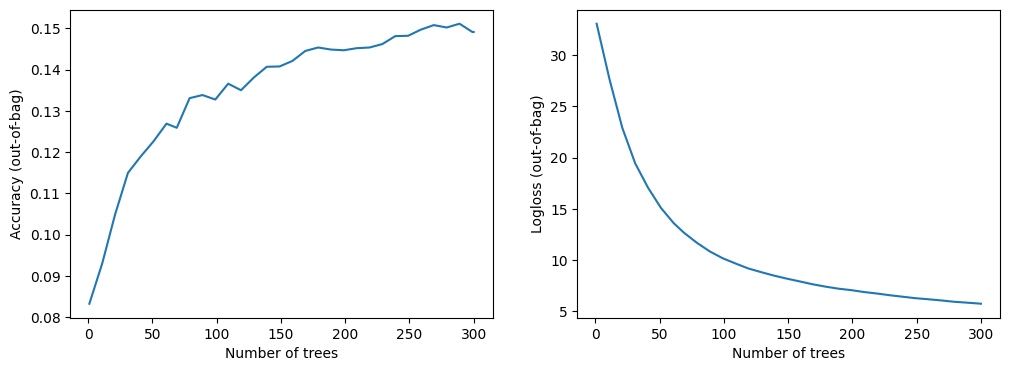

In [31]:
logs = rf_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [32]:
rf_model.save('/content/drive/MyDrive/data/rf_model')